### PHYS 249 Lab 4: Differentiation

Remember that the (first) derivative of a function $y = f(x)$, $f'(x_0) = df/dx|_{x_0}$, is also the slope of a tangent to $f$ at the point $x = x_0$. 

Over a short distance $\Delta x$, this slope is $a \sim \Delta y/\Delta x = \Delta f/\Delta x$, so we can estimate this from discrete data as
$$f'(x[i]) \sim (y[i+1] - y[i])/(x[i+1] - x[i])\,.$$
This estimate is called the *forward difference*. 

A comparably accurate estimate is the *backward difference*:
$$f'(x[i]) \sim (y[i] - y[i-1])/(x[i] - x[i-1])\,.$$

Finally, we can combine or average the two to get the *central difference*:
$$f'(x[i]) \sim (y[i+1] - y[i-1])/(x[i+1] - x[i-1])\,.$$

In this short exercise, you will compare these different methods for estimating derivatives to the exact (analytic) value.

1) In a code cell below, insert code to plot $f(x) = sin(x)$ from $0$ to $\pi$ in steps of $π/100$.

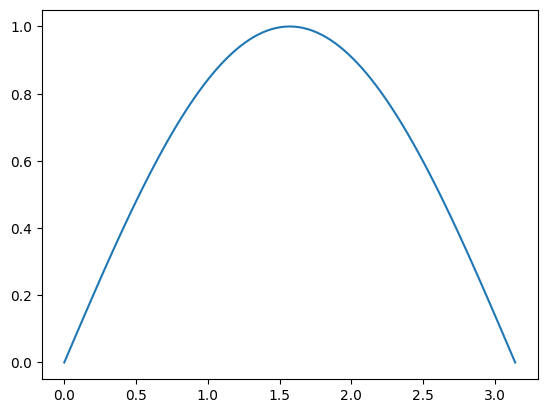

In [30]:
from matplotlib import pyplot as plt
from numpy import linspace, sin, pi

x = linspace(0, pi, 101)
y = sin(x)

plt.plot(x, y)
plt.show()





2) Remember that the derivative is the slope of a function at a point. The analytic derivative of $f(x)$ is $df/dx = cos(x)$. Pick a value $x_p$ between 0 and $\pi$, and plot a line passing through the point $(x,y) = (x_p, sin(x_p))$, with slope $cos(x_p)$. You should find that this line is the tangent to the curve $y = sin(x)$. 

*Hint: to plot a line with a given slope **s**, first consider a starting point $(X_0, Y_0)$ and then step forward by a small amount $dx$ to the end point $(x_0 + dx, y_0 + \mathbf{s} dx)$. You can create a list with the x coordinates of the starting and ending points, and a second list with the y coordinates of these points, and then give the two lists to plot(), which will join the two points together with a straight line.*

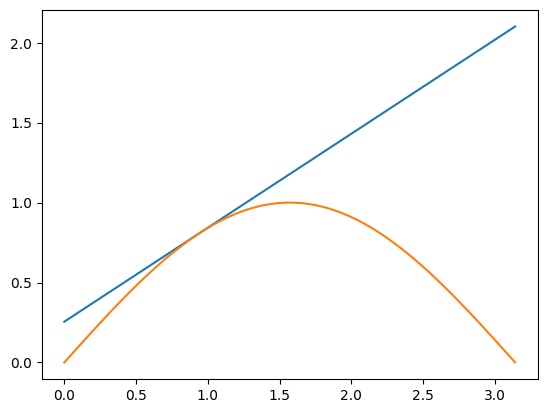

In [31]:
from numpy import cos

x = linspace(0,pi,101)


x_p = x[30]
y_p = sin(x_p)
slope = cos(x_p)

y = slope*(x-x_p) + y_p

plt.plot(x, y)
plt.plot(x, sin(x))
plt.show()




3) Estimate the derivative $df/dx$ numerically, using the **forward difference** method, for $x$ ranging from $\pi/100$ to $99\pi/100$. Plot the calculated value of the derivative versus $x$ and compare to the exact analytic value $cos(x)$. We will call this figure 1.



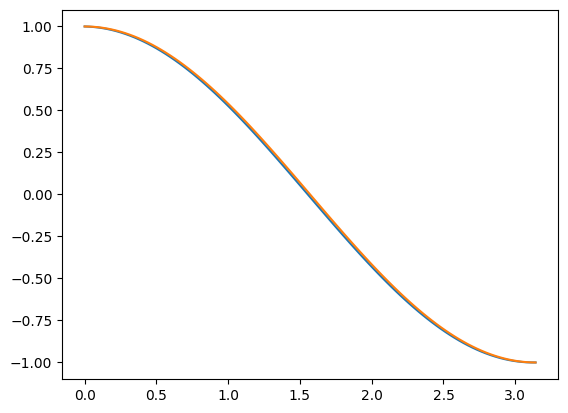

In [32]:
from numpy import zeros
x = linspace(0, pi, 101)
y = sin(x)
df = zeros(101)
df[0] = 1
df[100] = -1
# print(df)
for i in range(1, 100):
    df[i] = (y[i+1] - y[i])/(x[i+1] - x[i])

plt.plot(x, df)
plt.plot(x, cos(x))
plt.show()





4) Calculate the difference between your estimate and the exact derivative, for each value of $x$, and plot this versus $x$. We will call this figure 2.


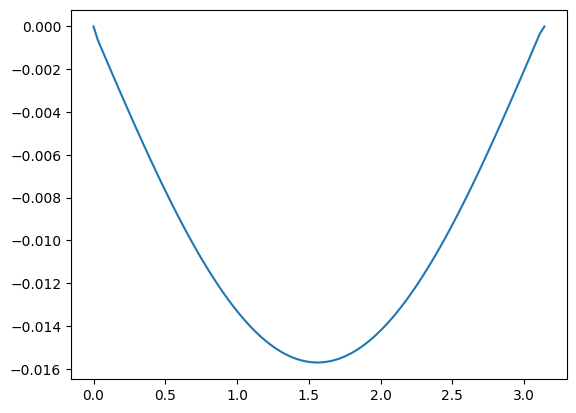

In [33]:
x = linspace(0, pi, 101)
err = df - cos(x)

plt.plot(x, err)
plt.show()

5) Estimate the derivative using the **backward difference** method from $\pi/100$ to $99\pi/100$ and add these values to figure 1 (using a different point/line colour). Calculate the difference between this estimate and the exact value, and add it to figure 2, using the same new colour.


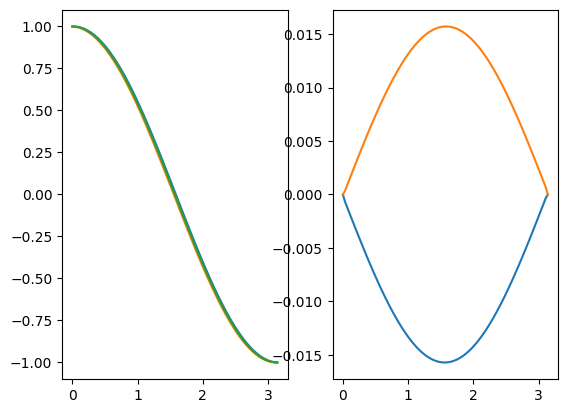

In [46]:
x = linspace(0, pi, 101)
y = sin(x)
df2 = zeros(101)
df2[0] = 1
df2[100] = -1

for i in range(1, 100):
    df2[i] = (y[i] - y[i-1])/(x[i] - x[i - 1])

plt.subplot(1, 2, 1)
plt.plot(x, df2)
plt.plot(x, df, x, cos(x))
# plt.show()


# x = linspace(0, pi, 101)
err2 = df2 - cos(x)

plt.subplot(1, 2, 2)
plt.plot(x, err, x, err2)
plt.show()

6) Now calculate the derivative using the **central difference** method, calculated over half steps, i.e. stepping forward and backward by an amount $\pi/200$. Compare to the previous results by plotting the new values on figure 1 and the differences with respect to the exact values on figure 2. (Once again, use a new colour for the lines/points.)


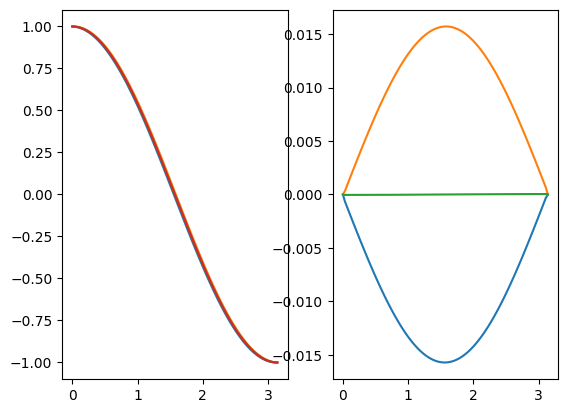

In [48]:
x2 = linspace(0, pi, 201)
y = sin(x2)
df3 = zeros(201)
df3[0] = 1
df3[200] = -1

for i in range(1, 200):
    df3[i] = (y[i+1] - y[i-1])/(x2[i+1] - x2[i - 1])

err3 = df3 - cos(x2)


plt.subplot(1,2,1)
plt.plot(x, df, x, df2, x2, df3, x2, cos(x2))

plt.subplot(1,2,2)
plt.plot(x, err, x, err2, x2, err3)

plt.show()

7) Finally, calculate the derivative using the central difference method over **whole** steps, i.e. stepping forward and backward by an amount $\pi/100$. Once again, picking a new colour, add the values to figure 1 and the differences to figure 2.

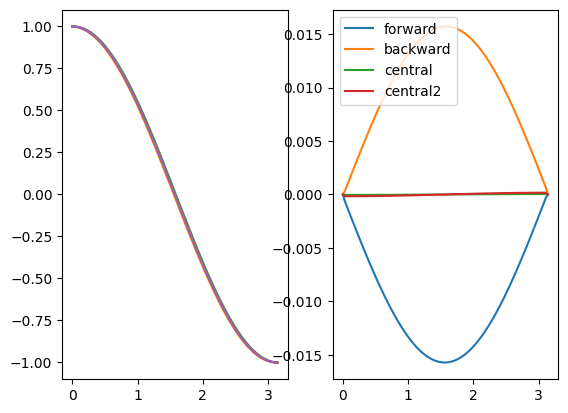

In [49]:
x = linspace(0, pi, 101)
y = sin(x)
df4 = zeros(101)
df4[0] = 1
df4[100] = -1

for i in range(1, 100):
    df4[i] = (y[i+1] - y[i-1])/(x[i+1] - x[i - 1])

err4 = df4 - cos(x)

plt.subplot(1, 2, 1)
plt.plot(x, cos(x), x, df, x, df2, x2, df3, x, df4)

plt.subplot(1, 2, 2)
plt.plot(x, err, label="forward")
plt.plot(x, err2, label="backward")
plt.plot(x2, err3, label="central")
plt.plot(x, err4, label="central2")
plt.legend()

plt.show()


By the end of the exercise, figures 1 and 2 should each contain 
four sets of values, for the four different methods. **(Ok well actually the way I did it, I had to regenerate the plot each time.)**